### LINEAR REGRESSION

In this notebook we'll going through the implementation and the details of a linear regression model.

In [2]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def generate_simple_dataset(n: int, beta: int, std: int):
    
    x = np.arange(1, n+1)
    e = std * np.random.randn(n) 
    y = beta*x + e
    return x, y

In [4]:
n = 100     # Number of samples
beta = 2    # Inclination of the line
std = 10    # Standard deviation

x, y = generate_simple_dataset(n, beta, std)

x = x.reshape((n, 1))
y = y.reshape((n, 1))

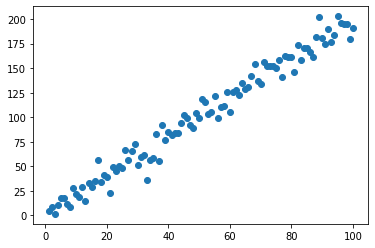

In [5]:
plt.scatter(x, y); plt.show()

In [114]:
def cost_function(X, y, theta):
    m, _ = X.shape                          # m --> number of samples
    h = np.matmul(X, theta)                 # h --> X (m, 2) * theta (2, 1), result on a vector (M x 1)
    J = np.sum(np.power(h - y, 2))/(2*m)    # J --> value of mean square error

    return J

In [147]:
theta   = np.ones((2, 1))   # Initialize the values of theta
X_ones  = np.ones((n, 1))   # Create a vector of size n fill with ones

X_ones  = np.append(X_ones, x, axis=1)  # Append the X matrix to the vector of ones

X_ones[:5,:]

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.]])

In [122]:
J = cost_function(X_ones, y, theta)
J

1749.312065230785

In [148]:
def gradient_descent(X, y, theta, alpha, iterations=100):
  J_history = []
  m, _ = X.shape

  for i in range(iterations):
    delta = np.sum(np.matmul(X, theta) - y, axis = 0) / m   # delta --> Vector (M x # thetas)
    theta = theta - alpha * delta                           # Update theta values

    J = cost_function(X, y, theta)                          # Get the cost value of the iteration
    J_history.append(J)

  return J_history, theta

In [149]:
alpha = 1e-3
J_history, theta = gradient_descent(X_ones, y, theta, alpha)

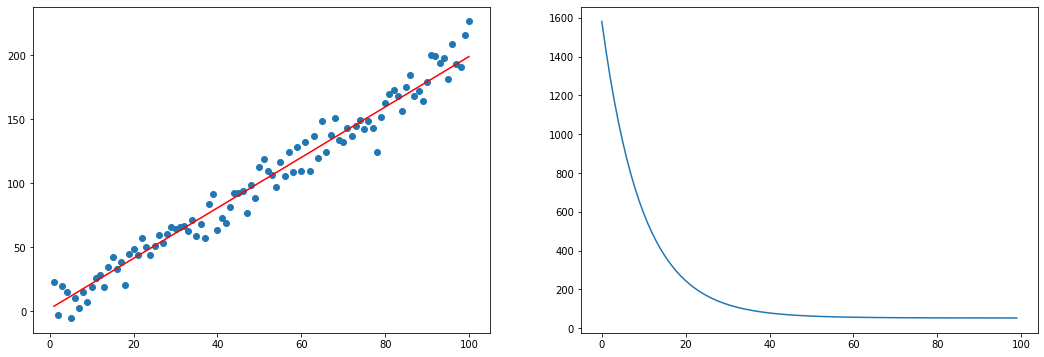

In [150]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))

y_predicted = np.matmul(X_ones, theta)

ax[0].scatter(x, y)
ax[0].plot(x, y_predicted, color='red')

ax[1].plot(J_history)

plt.show()